Analysis 1

In [2]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

1. Perform general Data analysis


In [3]:
df = pd.read_csv(r'C:\Users\india\My Python Files\DataAnalysisProject\Cleanedautos.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280557 entries, 0 to 280556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           280557 non-null  int64  
 1   dateCrawled          280557 non-null  object 
 2   name                 280557 non-null  object 
 3   seller               280557 non-null  object 
 4   offerType            280557 non-null  object 
 5   price                280557 non-null  int64  
 6   abtest               280557 non-null  object 
 7   vehicleType          280557 non-null  object 
 8   yearOfRegistration   280557 non-null  int64  
 9   gearbox              280557 non-null  object 
 10  powerPS              280557 non-null  float64
 11  model                280557 non-null  object 
 12  kilometer            280557 non-null  int64  
 13  monthOfRegistration  280557 non-null  int64  
 14  fuelType             280557 non-null  object 
 15  brand            

In [5]:
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,test,suv,2004,automatic,163.0,grand,125000,8,diesel,jeep,2016-03-14,90480,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,Angebot,1500,test,kleinwagen,2001,manual,75.0,golf,150000,6,benzin,volkswagen,2016-03-17,91074,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,test,kleinwagen,2008,manual,69.0,fabia,90000,7,diesel,skoda,2016-03-31,60437,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,Angebot,650,test,limousine,1995,manual,102.0,3er,150000,10,benzin,bmw,2016-04-04,33775,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,Angebot,2200,test,cabrio,2004,manual,109.0,2_reihe,150000,8,benzin,peugeot,2016-04-01,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280552,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,private,Angebot,1150,control,bus,2000,manual,116.0,zafira,150000,3,benzin,opel,2016-03-27,26624,2016-03-29 10:17:23
280553,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,private,Angebot,1199,test,cabrio,2000,automatic,101.0,fortwo,125000,3,benzin,smart,2016-03-05,26135,2016-03-11 18:17:12
280554,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,Angebot,9200,test,bus,1996,manual,102.0,transporter,150000,3,diesel,volkswagen,2016-03-19,87439,2016-04-07 07:15:26
280555,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,private,Angebot,3400,test,kombi,2002,manual,100.0,golf,150000,6,diesel,volkswagen,2016-03-20,40764,2016-03-24 12:45:21


2.Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

<Axes: title={'center': 'Distribution of Vehicles based on Year of Registration'}, ylabel='Density'>

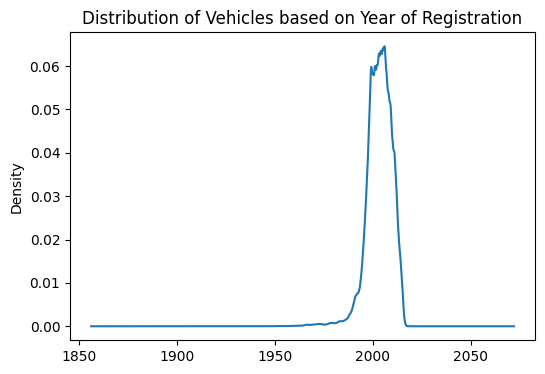

In [7]:
df['yearOfRegistration'].plot(kind = 'kde', figsize=(6,4),
                              title = 'Distribution of Vehicles based on Year of Registration',
                              xlabel = 'Year of Registration')

* 'yearOfRegistration' is left skewed data. There are more data points are between 1980 to 2015

3. Create a plot based on the Variation of the price range by the vehicle type


<Axes: xlabel='vehicleType'>

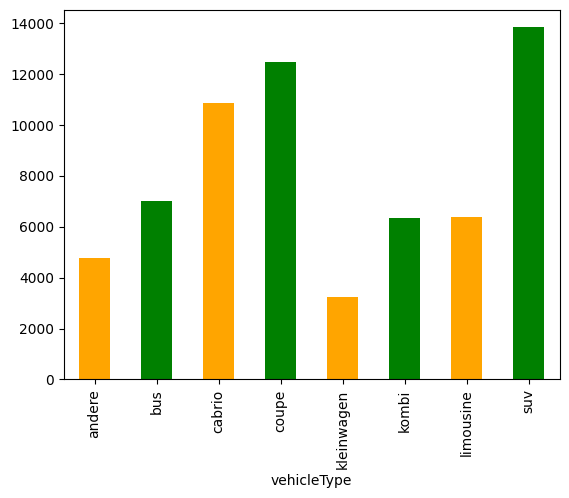

In [31]:
df.groupby("vehicleType")["price"].mean().plot(kind="bar", color = ['orange', 'green'])

* SUVs has the highest price range, followed by Carbio and least in Kleiwagen.

 4. Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [18]:
vehiclecount = df['vehicleType'].value_counts()
vehiclecount

vehicleType
limousine     82775
kleinwagen    61482
kombi         57952
bus           27072
cabrio        20164
coupe         15840
suv           13080
andere         2192
Name: count, dtype: int64

<Axes: xlabel='vehicletype', ylabel='counts'>

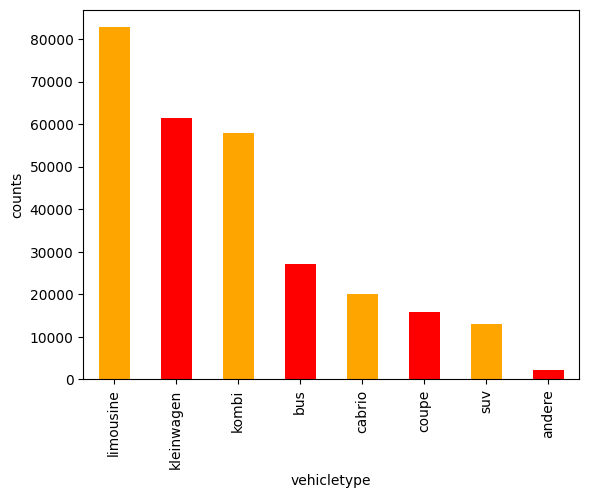

In [29]:
vehiclecount.plot(kind="bar",ylabel="counts",xlabel="vehicletype", color = ['orange', 'red'])

* limousine brand has more number of vehicletypes and there are less vehicle types in andere brand 

5. Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [35]:
correlation = df['price'].corr(df['kilometer'])
print(f"Correlation between dollar_price and kilometer: {correlation}")

Correlation between dollar_price and kilometer: -0.3328688392017022


Text(0.5, 1.0, 'Correlation Heatmap: Dollar Price vs. Kilometer')

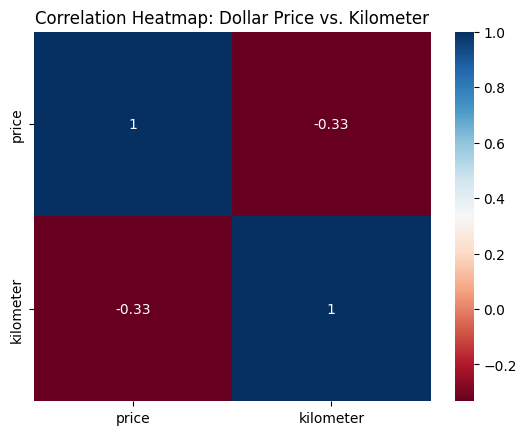

In [45]:
corr = df[['price','kilometer']].corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu')
plt.title('Correlation Heatmap: Dollar Price vs. Kilometer')

* There is negative corelation of -0.332 between price and kilometer